In [27]:
# for basic operations
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
from scipy import stats
# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# reading the data
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.shape

(21613, 21)

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Plot

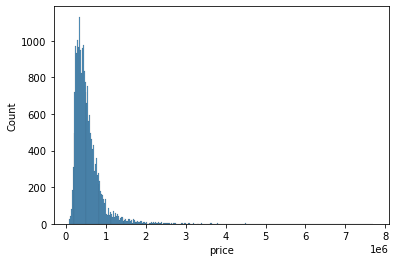

In [8]:
sns.histplot(data['price'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


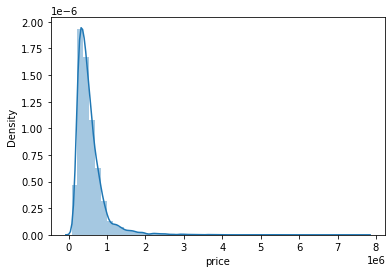

In [9]:
sns.distplot(data['price'])
plt.show()

In [10]:
print(data['price'].min())
print(data['price'].max())
print(data['price'].mean())
print(data['price'].median())
print(data['price'].mode())
print(data['price'].std())
print(data['price'].var())
print(data['price'].kurt())
print(data['price'].skew())

75000.0
7700000.0
540088.1417665294
450000.0
0    350000.0
1    450000.0
dtype: float64
367127.1964826997
134782378397.24681
34.58554043194243
4.024069144684712


In [11]:
np.random.seed(23)
sampleprice = np.random.choice(a=data['price'],size=200)
sampleprice.mean()

494162.075

<AxesSubplot:>

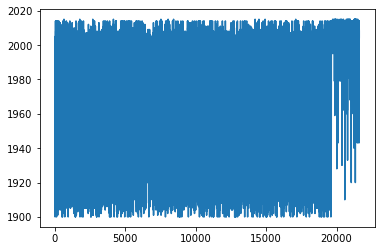

In [14]:
data['yr_built'].plot()

In [20]:
a= data[data['yr_built']<=1980]['price']
b=data[data['yr_built']>1980]['price']
stats.ttest_ind(a,b,axis=0,equal_var=True)

Ttest_indResult(statistic=-17.06763740286221, pvalue=6.883542674581516e-65)

In [28]:
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = stats.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


price = pd.qcut(data['price'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.yr_built, price)

Frequency table
price     High  Medium  Low
yr_built                   
1900        18      34   35
1901         2      13   14
1902         4       8   15
1903        15      18   13
1904        13      16   16
...        ...     ...  ...
2011        33      53   44
2012        57      55   58
2013        41      61   99
2014        73     185  301
2015         3      10   25

[116 rows x 3 columns]
ChiSquare test statistic:  1731.418631899911
p-value:  3.494881075674146e-228



 -------------------- describe ---------------------

floors           1.0           1.5           2.0           2.5           3.0  \
count   1.068000e+04  1.910000e+03  8.241000e+03  1.610000e+02  6.130000e+02   
mean    4.421806e+05  5.589806e+05  6.488912e+05  1.060346e+06  5.825260e+05   
std     2.640032e+05  3.035413e+05  4.339377e+05  8.582595e+05  3.382492e+05   
min     7.500000e+04  9.200000e+04  9.000000e+04  2.550000e+05  2.050000e+05   
25%     2.750000e+05  3.550000e+05  3.788000e+05  5.500000e+05  3.850000e+05   
50%     3.900000e+05  5.244750e+05  5.429500e+05  7.992000e+05  4.900000e+05   
75%     5.300000e+05  6.878750e+05  7.725000e+05  1.300000e+06  6.315000e+05   
max     4.668000e+06  3.650000e+06  7.062500e+06  7.700000e+06  3.100000e+06   

floors           3.5  
count   8.000000e+00  
mean    9.333125e+05  
std     9.786165e+05  
min     4.350000e+05  
25%     5.135000e+05  
50%     5.345000e+05  
75%     6.963750e+05  
max     3.300000e+06  


 --------------

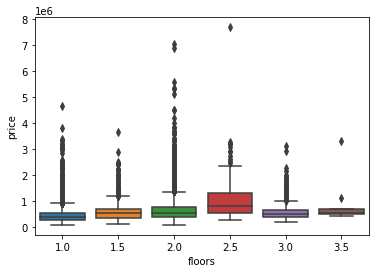

In [26]:
print('\n -------------------- describe ---------------------\n')
print(data.groupby('floors')['price'].describe().T)
    
    
#box_plot(category_cols,independent_col,dependent_col)
sns.boxplot(x='floors', y='price', data = data)
print('\n\n -------------------- One way anova ---------------------\n')